In [1]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pyFAI

In [3]:
wos = pyFAI.detector_factory("/users/kieffer/workspace-400/pyFAI/doc/source/usage/tutorial/Distortion/WOS.h5")
print(wos)

NexusDetector detector from NeXus file: /users/kieffer/workspace-400/pyFAI/doc/source/usage/tutorial/Distortion/WOS.h5	 PixelSize= 1.300e-04, 1.300e-04 m


/scisoft/users/jupyter/jupy34/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/scisoft/users/jupyter/jupy34/lib/python3.4/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in log


<IPython.core.display.Javascript object>


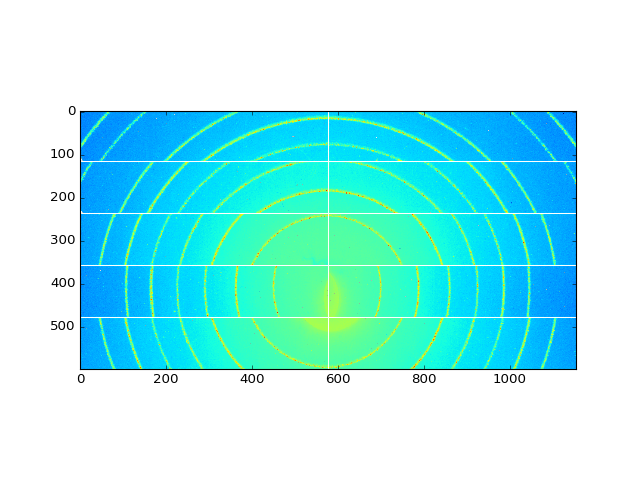

In [5]:
img = "/users/kieffer/workspace-400/pyFAI/doc/source/usage/tutorial/Distortion/WOS.edf"
import fabio
raw = fabio.open(img).data
imshow(numpy.log(raw))

In [14]:
from pyFAI.distortion import Distortion
dis = Distortion(wos, resize=True, method="csr")

/scisoft/users/jupyter/jupy34/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


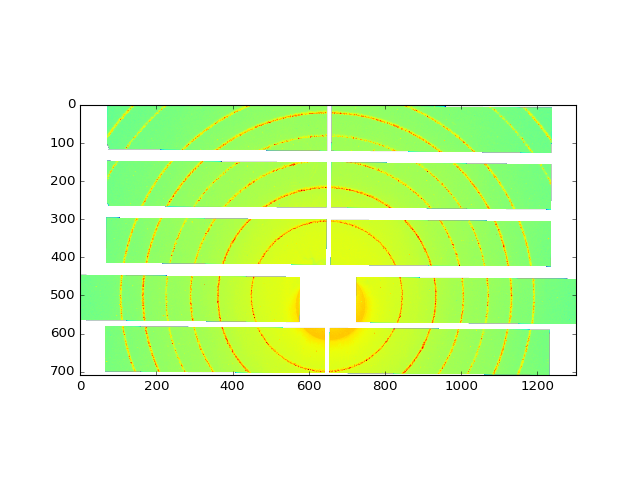

In [15]:
res = dis.correct(raw)
imshow(numpy.log(res))

In [16]:
dis.lut

(array([  1.15139604e-01,   4.69919890e-08,   8.81283939e-01, ...,
          3.66451927e-02,   3.94637942e-01,   3.73821147e-02], dtype=float32),
 array([     0,   1154,      0, ..., 690090, 690091, 690091], dtype=int32),
 array([      0,       0,       0, ..., 2721379, 2721379, 2721379], dtype=int32))

In [17]:
import scipy.sparse.linalg

In [18]:
CSR = scipy.sparse.csr_matrix(dis.lut)

In [20]:
from scipy.sparse import linalg

In [29]:
%time B = linalg.lsmr(CSR, res.ravel())

CPU times: user 6.33 s, sys: 0 ns, total: 6.33 s
Wall time: 6.34 s


/scisoft/users/jupyter/jupy34/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/scisoft/users/jupyter/jupy34/lib/python3.4/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in log
  if __name__ == '__main__':


<IPython.core.display.Javascript object>


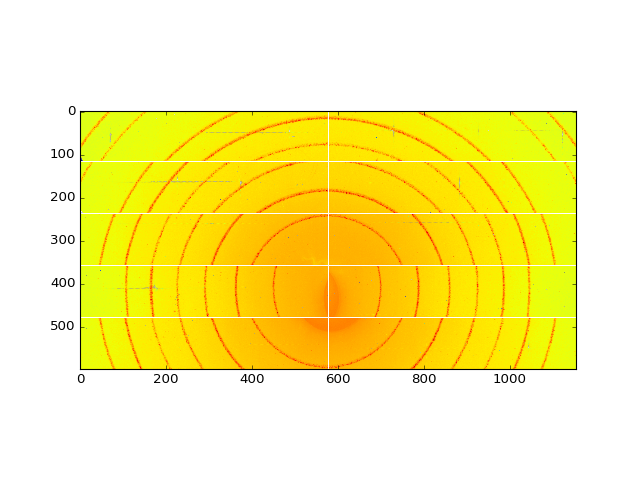

In [37]:
imshow(numpy.log(B[0].reshape(raw.shape)))

<IPython.core.display.Javascript object>


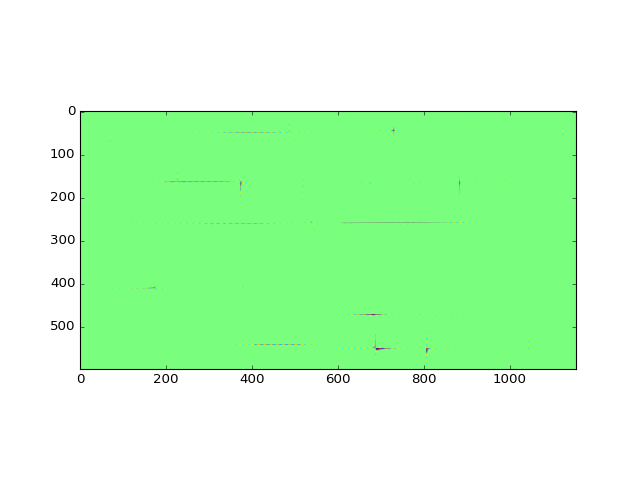

0.011325953318648361

In [38]:
b= B[0].reshape(raw.shape)
imshow(b-raw)
(b-raw).mean()